Overall Top-1 Accuracy: 58.54%

Confusion Matrix:
           Pred_0  Pred_1
Actual_0       1       0
Actual_1      17      23 



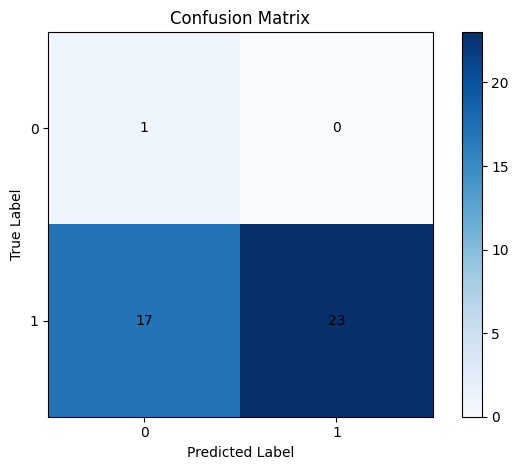

In [3]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# 1) Load the dumped test results
result_path = r"D:\mmaction2\result\result.pkl"
with open(result_path, "rb") as f:
    results = pickle.load(f)

# 2) Convert to DataFrame
rows = []
for entry in results:
    rows.append({
        "gt_label": int(entry["gt_label"].item()),
        "pred_label": int(entry["pred_label"].item()),
    })
df = pd.DataFrame(rows)

# 3) Compute overall Top-1 accuracy
accuracy = (df["gt_label"] == df["pred_label"]).mean()
print(f"Overall Top-1 Accuracy: {accuracy:.2%}\n")

# 4) Compute confusion matrix
labels = sorted(df["gt_label"].unique())
cm = confusion_matrix(df["gt_label"], df["pred_label"], labels=labels)
cm_df = pd.DataFrame(cm, index=[f"Actual_{l}" for l in labels],
                     columns=[f"Pred_{l}" for l in labels])
print("Confusion Matrix:\n", cm_df, "\n")

# 5) Plot confusion matrix
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks(range(len(labels)), labels)
plt.yticks(range(len(labels)), labels)
for i in range(len(labels)):
    for j in range(len(labels)):
        plt.text(j, i, cm[i, j], ha="center", va="center")
plt.colorbar()
plt.tight_layout()
plt.show()
